<a href="https://colab.research.google.com/github/henry-254/CapstoneProjects/blob/main/Financial_inclusion_in_africa.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [246]:
# You are asked to predict the likelihood of the person having a bank account or not (Yes = 1, No = 0), for each unique id in the test dataset . 
# You will train your model on 70% of the data and test your model on the final 30% of the data, across four East African countries - 
# Kenya, Rwanda, Tanzania, and Uganda

In [247]:
! unzip financial-inclusion-in-africa.zip

Archive:  financial-inclusion-in-africa.zip
replace StarterNotebook.ipynb? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
  inflating: StarterNotebook.ipynb   
  inflating: Train.csv               
  inflating: Test.csv                
  inflating: VariableDefinitions.csv  
  inflating: SampleSubmission.csv    


In [248]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [310]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold, StratifiedKFold
import scipy
from sklearn.naive_bayes import GaussianNB

from sklearn.model_selection import cross_val_score

In [250]:
data = pd.read_csv('Train.csv')
test_data = pd.read_csv("Test.csv")


In [251]:
data

,country,year,uniqueid,bank_account,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3,24,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5,70,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5,26,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,No,Rural,Yes,5,34,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,No,Urban,No,8,26,Male,Child,Single/Never Married,Primary education,Informally employed
...,...,...,...,...,...,...,...,...,...,...,...,...,...
23519,Uganda,2018,uniqueid_2113,No,Rural,Yes,4,48,Female,Head of Household,Divorced/Seperated,No formal education,Other Income
23520,Uganda,2018,uniqueid_2114,No,Rural,Yes,2,27,Female,Head of Household,Single/Never Married,Secondary education,Other Income
23521,Uganda,2018,uniqueid_2115,No,Rural,Yes,5,27,Female,Parent,Widowed,Primary education,Other Income
23522,Uganda,2018,uniqueid_2116,No,Urban,Yes,7,30,Female,Parent,Divorced/Seperated,Secondary education,Self employed


In [252]:
data.isnull().sum()

country                   0
year                      0
uniqueid                  0
bank_account              0
location_type             0
cellphone_access          0
household_size            0
age_of_respondent         0
gender_of_respondent      0
relationship_with_head    0
marital_status            0
education_level           0
job_type                  0
dtype: int64

In [253]:
for col in data.columns:
  sum = data[col].nunique()
  values = data[col].unique()
  print(f'number of unique values in {col}', sum)
  print(f'element of unique values in{col}', values)
  print('_'*20)

number of unique values in country 4
element of unique values incountry ['Kenya' 'Rwanda' 'Tanzania' 'Uganda']
____________________
number of unique values in year 3
element of unique values inyear [2018 2016 2017]
____________________
number of unique values in uniqueid 8735
element of unique values inuniqueid ['uniqueid_1' 'uniqueid_2' 'uniqueid_3' ... 'uniqueid_8757'
 'uniqueid_8758' 'uniqueid_8759']
____________________
number of unique values in bank_account 2
element of unique values inbank_account ['Yes' 'No']
____________________
number of unique values in location_type 2
element of unique values inlocation_type ['Rural' 'Urban']
____________________
number of unique values in cellphone_access 2
element of unique values incellphone_access ['Yes' 'No']
____________________
number of unique values in household_size 20
element of unique values inhousehold_size [ 3  5  8  7  1  6  4 10  2 11  9 12 16 15 13 14 21 18 17 20]
____________________
number of unique values in age_of_respo

In [254]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23524 entries, 0 to 23523
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   country                 23524 non-null  object
 1   year                    23524 non-null  int64 
 2   uniqueid                23524 non-null  object
 3   bank_account            23524 non-null  object
 4   location_type           23524 non-null  object
 5   cellphone_access        23524 non-null  object
 6   household_size          23524 non-null  int64 
 7   age_of_respondent       23524 non-null  int64 
 8   gender_of_respondent    23524 non-null  object
 9   relationship_with_head  23524 non-null  object
 10  marital_status          23524 non-null  object
 11  education_level         23524 non-null  object
 12  job_type                23524 non-null  object
dtypes: int64(3), object(10)
memory usage: 2.3+ MB


In [255]:
##since there are no null values in the dataset, no need of handling missing values
## the column id doesnt seem to have any effect on the data, so we will just delete the column
data.drop('uniqueid', axis =1, inplace =True)

In [256]:
data.describe()

,year,household_size,age_of_respondent
count,23524.000000,23524.000000,23524.000000
mean,2016.975939,3.797483,38.805220
std,0.847371,2.227613,16.520569
min,2016.000000,1.000000,16.000000
25%,2016.000000,2.000000,26.000000
50%,2017.000000,3.000000,35.000000
75%,2018.000000,5.000000,49.000000
max,2018.000000,21.000000,100.000000


In [257]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10086 entries, 0 to 10085
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   country                 10086 non-null  object
 1   year                    10086 non-null  int64 
 2   uniqueid                10086 non-null  object
 3   location_type           10086 non-null  object
 4   cellphone_access        10086 non-null  object
 5   household_size          10086 non-null  int64 
 6   age_of_respondent       10086 non-null  int64 
 7   gender_of_respondent    10086 non-null  object
 8   relationship_with_head  10086 non-null  object
 9   marital_status          10086 non-null  object
 10  education_level         10086 non-null  object
 11  job_type                10086 non-null  object
dtypes: int64(3), object(9)
memory usage: 945.7+ KB


In [258]:
test_data.isnull().sum()

country                   0
year                      0
uniqueid                  0
location_type             0
cellphone_access          0
household_size            0
age_of_respondent         0
gender_of_respondent      0
relationship_with_head    0
marital_status            0
education_level           0
job_type                  0
dtype: int64

## Visualization
### numeric data(year,household size, age of respondent)

In [259]:
def barplot(features):
  grouped = data.groupby(features)['bank_account'].value_counts()
  grouped= pd.DataFrame(grouped)
 
  grouped.rename(columns ={'bank_account': 'counts'}, inplace =True)
  grouped.reset_index(inplace = True)
  

  fig = px.bar(grouped , x = features , y = 'counts', color = 'bank_account', title = f'comparison of bank_accounts for different {features}')
  fig.show()
   


In [260]:
barplot('household_size')

In [261]:
### from the graph above we can tell, that the households that are in fewer size, has more bank accounts compared to the one with larger sizes 

In [262]:
barplot('cellphone_access')

In [263]:
# we can conclude, cell_phone access gives ease to people for access to a  bank account.

In [264]:
barplot('location_type')

In [265]:
barplot('country')

In [266]:
## we can tell that majority of this countries, people dont have a bank account, while in the majority of people who have a bank account are in kenya


In [267]:
barplot('relationship_with_head')

In [268]:
barplot('gender_of_respondent')

In [269]:
barplot('year')

In [270]:
barplot('age_of_respondent')

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:848: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.


/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:848: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.




<function matplotlib.pyplot.xlim(*args, **kwargs)>

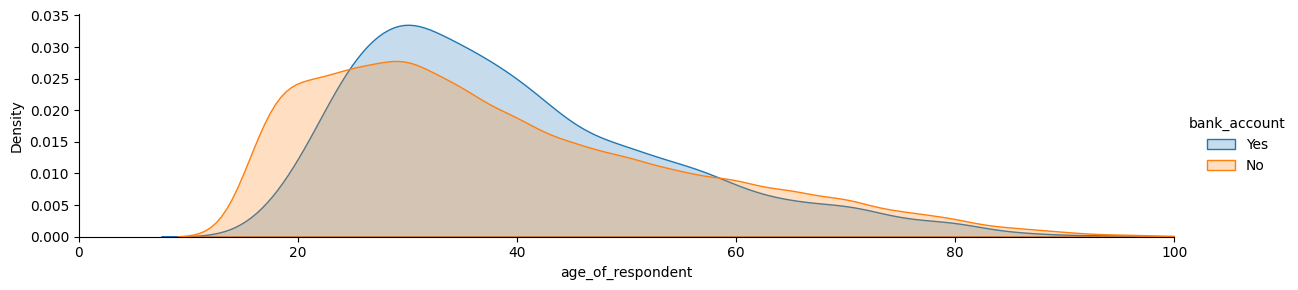

In [271]:

fig = sns.FacetGrid(data, hue = 'bank_account', aspect = 4)
fig.map(sns.kdeplot, 'age_of_respondent', shade = True)
fig.set(xlim=(0,data['age_of_respondent'].max()))
fig.add_legend()
plt.xlim

In [272]:
# the second distribution, give us the ease to compare the age of respondent and the likelyhood of having an account
# we can tell people from early 20's to early 40's are the one who are likely to have a bank account

In [273]:
barplot('job_type')

In [274]:
# we then can do encoding dor further anaysis,since majority of our data is in object dtype

In [277]:

cat = data.select_dtypes(include = 'object')

In [278]:
from sklearn.preprocessing import LabelEncoder

# Create an instance of LabelEncoder
label_encoder = LabelEncoder()

# Create a dictionary to store the encoded variables
encoded_variables = {}

# Apply label encoding to each variable
for  col in cat.columns:
    data[col] = label_encoder.fit_transform(cat[col])





In [279]:
test_data.drop(columns ='uniqueid',inplace = True)
cats = test_data.select_dtypes(include  ='object')

In [281]:
from sklearn.preprocessing import LabelEncoder

# Create an instance of LabelEncoder
label_encoder = LabelEncoder()

# Create a dictionary to store the encoded variables
encoded_variables = {}

# Apply label encoding to each variable
for  col in cats.columns:
    test_data[col] = label_encoder.fit_transform(cats[col])

<Axes: >

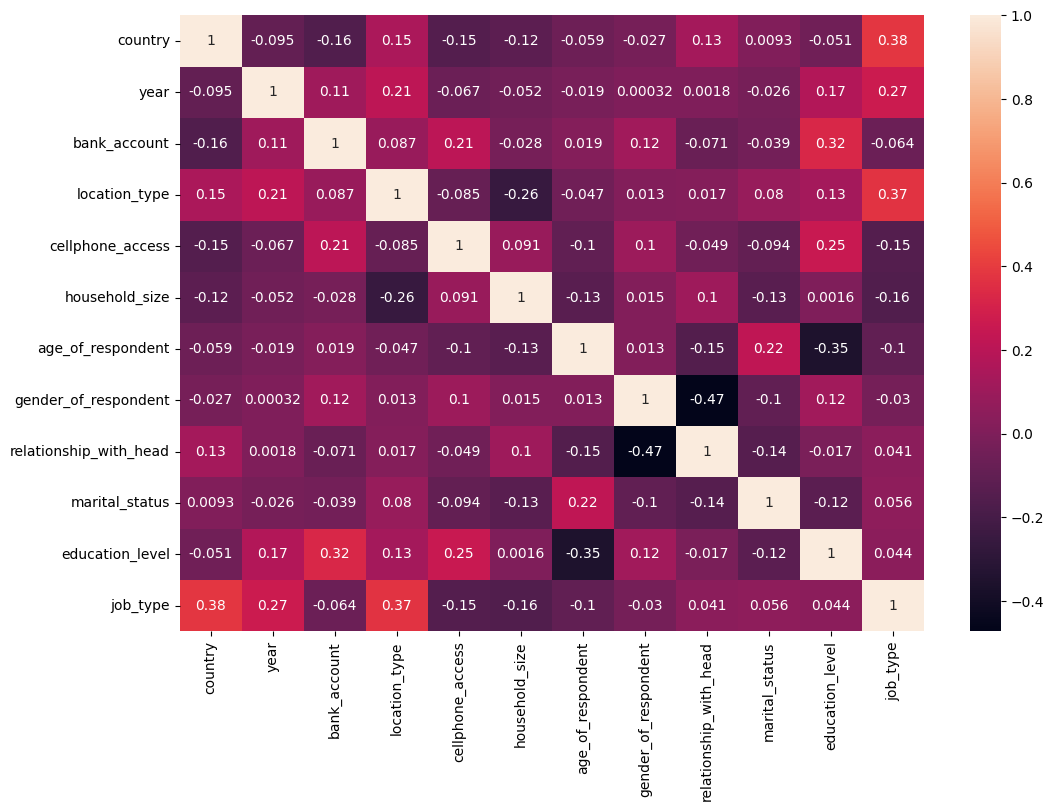

In [282]:
plt.figure(figsize = (12,8))
sns.heatmap(data.corr(),annot =True)

### Modelling

Cross Validatiom



In [283]:
# we split our data training and target data

X = data.drop('bank_account',axis = 1)
y = data['bank_account']


In [284]:
### k nearest neighbours(KNN)(creating an instance of the classifier)

knn = KNeighborsClassifier(n_neighbors=1)

#fitting in the data
knn.fit(X,y)

KNeighborsClassifier(n_neighbors=1)

In [315]:
## lets use cross validation
clf = KNeighborsClassifier(n_neighbors = 10)

scoring = 'accuracy'

score = cross_val_score(clf, X, y, cv = k_fold, n_jobs = 1, scoring = scoring)

print(score)



[0.86697833 0.87505312 0.87845304 0.87250319 0.86989796 0.88180272
 0.87585034 0.88052721 0.8707483  0.86734694]


In [317]:
score.mean()

0.8739161144695873

In [304]:
## Decision Tree

clf = DecisionTreeClassifier()

scoring = 'accuracy'

score = cross_val_score(clf, X, y, cv = k_fold, n_jobs = 1, scoring = scoring)

print(score)


[0.83255419 0.84445389 0.85380365 0.84445389 0.83588435 0.84268707
 0.8422619  0.83418367 0.84183673 0.84396259]


In [318]:
## RandomForest

clf = RandomForestClassifier()

scoring = 'accuracy'

score =cross_val_score(clf, X,y, cv = k_fold, n_jobs = 1 , scoring = scoring)

print(score)

[0.86272843 0.85932852 0.88355291 0.8678283  0.8664966  0.86777211
 0.86309524 0.86692177 0.87287415 0.86692177]


In [319]:
score.mean()

0.8677519796698959

In [312]:
## Naives Bayes

clf = GaussianNB()

scoring = 'accuracy'

score = cross_val_score(clf, X, y, cv = k_fold, n_jobs= 1, scoring= scoring)

print(score)

[0.83000425 0.84657884 0.83765406 0.8440289  0.83248299 0.83163265
 0.82482993 0.84481293 0.83503401 0.83928571]


In [314]:
### SVC

clf = SVC()
scoring = 'accuracy'
score = cross_val_score(clf, X, y, cv= k_fold, n_jobs=1, scoring=scoring)
print(score)

[0.85167871 0.85082873 0.86272843 0.85847854 0.85119048 0.86947279
 0.86564626 0.85969388 0.86479592 0.85756803]


In [ ]:
## we can tell that KNN givess the best score and hence we can use for our predictions

In [322]:
# testing
clf = KNeighborsClassifier()

clf.fit(X, y)

prediction = clf.predict(test_data)

In [324]:
prediction

array([1, 1, 0, ..., 0, 0, 0])